<a href="https://colab.research.google.com/github/shahfaissal/EDA-on-IMDB-data/blob/main/FInal_EDA_on_IMDB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## You have been hired by a rookie movie producer to help him decide what type of movies to produce and which actors to cast. You have to back your recommendations based on thorough analysis of the data he shared with you which has the list of 3000 movies and the corresponding details.

## As a data scientist, you have to first explore the data and check its sanity.

## Further, you have to answer the following questions:
1. ### <b> Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.</b>
2. ### <b>This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)? </b>
3. ### <b> Find out the unique genres of movies in this dataset.</b>
4. ### <b> Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI? </b>
5. ### <b> Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor. </b>




# Data Exploration

In [170]:
#Import package
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
imdb = pd.read_csv("/content/drive/MyDrive/Copy of imdb_data.csv")

# Know Your data!

In [110]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [111]:
imdb.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [112]:
imdb.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [113]:
imdb.tail()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,...,1/16/04,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For the most cautious man on Earth, life is ab...",Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386
2999,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,...,9/22/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155


In [114]:
#Statitical aspect of the dataframe
imdb.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [115]:
#Null value count in percentage
imdb.isnull().sum().sort_index(ascending=True)
percent_missing = imdb.isnull().sum() * 100 / len(imdb)
percent_missing

id                        0.000000
belongs_to_collection    79.866667
budget                    0.000000
genres                    0.233333
homepage                 68.466667
imdb_id                   0.000000
original_language         0.000000
original_title            0.000000
overview                  0.266667
popularity                0.000000
poster_path               0.033333
production_companies      5.200000
production_countries      1.833333
release_date              0.000000
runtime                   0.066667
spoken_languages          0.666667
status                    0.000000
tagline                  19.900000
title                     0.000000
Keywords                  9.200000
cast                      0.433333
crew                      0.533333
revenue                   0.000000
dtype: float64

In [116]:
#filling all the null values with empty list in string of dicts
imdb['genres'].fillna('[]',inplace=True)
imdb['cast'].fillna('[]',inplace=True)
imdb['crew'].fillna('[]',inplace=True)

In [117]:
#function to convert string to list
def string_to_list(str):
  return eval(str)

In [118]:
#applying function to convert string to list
imdb['genres'] = imdb['genres'].apply(string_to_list)
imdb['cast'] = imdb['cast'].apply(string_to_list)
imdb['crew'] = imdb['crew'].apply(string_to_list)  

In [119]:
#creating a copy
imdb_df = imdb.copy()


In [120]:
#replace extremly low value of budget with median
imdb_df.loc[imdb_df['budget']<1000,'budget'] = imdb_df.loc[imdb_df['budget']>=1000,'budget'].median()
imdb_df.loc[imdb_df['revenue']<1000,'revenue'] = imdb_df.loc[imdb_df['revenue']>=1000,'revenue'].median()

In [121]:
imdb_df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.708250e+07,8.463274,107.856571,6.705811e+07
std,866.169729,3.492773e+07,12.104000,22.086434,1.373917e+08
min,1.000000,2.500000e+03,0.000001,0.000000,1.404000e+03
25%,750.750000,1.000000e+07,4.018053,94.000000,2.947600e+06
50%,1500.500000,1.645000e+07,7.374861,104.000000,1.748753e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


# 1.Which movie made the highest profit? Who were its producer and director? Identify the actors in that film

* profit can be calculated as the difference between revenue and budget





In [122]:
#creating profit column for movies 
imdb_df['profit']=imdb_df['revenue'] - imdb_df['budget']

In [123]:
#movie with highest profit
highest_id = imdb_df['profit'].argmax()
max_profit = imdb_df['profit'].max()

print(f"the movie with highest profit i.e Rs {max_profit} is {imdb['original_title'][highest_id]}")

the movie with highest profit i.e Rs 1316249360 is Furious 7


In [124]:
# function to extract directors and producers
def extract(crew):
  try:
    director_list = []
    producer_list = []
    for i in crew:
      if i['job']=='Producer':
        producer_list.append(i['name'])
      if i['job']=='Director':
        director_list.append(i['name'])
    return director_list,producer_list
  except:
    return [],[]


In [125]:
# lamda function applied on crew column to extract directors and producers
imdb_df['directors_and_producers'] = imdb_df.apply(lambda x:extract(x['crew']),axis = 1)

In [126]:
imdb_df['directors_and_producers']

0                          ([Steve Pink], [Andrew Panay])
1       ([Garry Marshall], [Whitney Houston, Mario Isc...
2       ([Damien Chazelle], [David Lancaster, Michel L...
3                          ([Sujoy Ghosh], [Sujoy Ghosh])
4                                  ([Jong-seok Yoon], [])
                              ...                        
2995               ([Dennis Hopper], [James G. Robinson])
2996                 ([Lukas Moodysson], [Lars J√∂nsson])
2997    ([Renny Harlin], [Stephanie Austin, Shane Blac...
2998    ([John Hamburg], [Danny DeVito, Michael Shambe...
2999    ([John Singleton], [Doug Davison, Roy Lee, Ell...
Name: directors_and_producers, Length: 3000, dtype: object

In [127]:
#directors and producers of highest profit movie
director_and_producers = imdb_df['directors_and_producers'][highest_id]
print(director_and_producers)

(['James Wan'], ['Vin Diesel', 'Neal H. Moritz', 'Michael Fottrell', 'Brandon Birtell'])


In [128]:
#function for actors of highest profit movie
def actors(cast):
  actors_list = []
  for i in cast:
    actors_list.append(i['name'])
  return actors_list

In [129]:
#actors of highest profit movie
imdb_df['actors'] = imdb_df.apply(lambda x:actors(x['cast']),axis=1)
actors_highest_profit_movie = imdb_df['actors'][highest_id]
print((actors_highest_profit_movie))

['Vin Diesel', 'Paul Walker', 'Dwayne Johnson', 'Michelle Rodriguez', 'Tyrese Gibson', 'Ludacris', 'Jordana Brewster', 'Djimon Hounsou', 'Tony Jaa', 'Ronda Rousey', 'Nathalie Emmanuel', 'Kurt Russell', 'Jason Statham', 'Sung Kang', 'Gal Gadot', 'Lucas Black', 'Elsa Pataky', 'Noel Gugliemi', 'John Brotherton', 'Luke Evans', 'Ali Fazal', 'Miller Kimsey', 'Charlie Kimsey', 'Eden Estrella', 'Gentry White', 'Iggy Azalea', 'Jon Lee Brody', 'Levy Tran', 'Anna Colwell', 'Viktor Hernandez', 'Steve Coulter', 'Robert Pralgo', 'Antwan Mills', 'J.J. Phillips', 'Jorge Ferragut', 'Sara Sohn', 'Benjamin Blankenship', 'D.J. Hapa', 'T-Pain', 'Brian Mahoney', 'Brittney Alger', 'Romeo Santos', 'Jocelin Donahue', 'Stephanie Langston', 'Jorge-Luis Pallo', 'Tego Calder√≥n', 'Nathalie Kelley', 'Shad Moss', 'Don Omar', 'Klement Tinaj', 'Caleb Walker', 'Cody Walker']


In [168]:
top_movies=imdb_df.sort_values(by='profit',ascending=False).head(10)
lst=['original_title','budget','profit']
top_movies[lst]

,original_title,budget,profit
1761,Furious 7,190000000,1316249360
1126,The Avengers,220000000,1299557910
2770,Avengers: Age of Ultron,280000000,1125403694
684,Beauty and the Beast,160000000,1102886337
2322,Transformers: Dark of the Moon,195000000,928746996
734,Zootopia,150000000,873784195
1735,Jurassic Park,63000000,857100000
543,The Lord of the Rings: The Two Towers,79000000,847287400
906,The Dark Knight Rises,250000000,834939099
2562,Finding Dory,200000000,828570889


# In the above step we have found out the top 10 movies in terms of profit earned

In [169]:
top_movies

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,crew,revenue,profit,directors_and_producers,actors,ROI,genres_name,Names,director,producer
1761,1762,"[{'id': 9485, 'name': 'The Fast and the Furiou...",190000000,"[{'id': 28, 'name': 'Action'}]",http://www.furious7.com/,tt2820852,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,27.275687,...,"[{'credit_id': '52fe4cc8c3a36847f823e681', 'de...",1506249360,1316249360,"([James Wan], [Vin Diesel, Neal H. Moritz, Mic...","[Vin Diesel, Paul Walker, Dwayne Johnson, Mich...",692.762821,[Action],Action,[James Wan],"[Vin Diesel, Neal H. Moritz, Michael Fottrell,..."
1126,1127,"[{'id': 86311, 'name': 'The Avengers Collectio...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,...,"[{'credit_id': '52fe4495c3a368484e02b1cf', 'de...",1519557910,1299557910,"([Joss Whedon], [Kevin Feige])","[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",590.708141,"[Science Fiction, Action, Adventure]",Science Fiction,[Joss Whedon],[Kevin Feige]
2770,2771,"[{'id': 86311, 'name': 'The Avengers Collectio...",280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/193/avengers_ag...,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,37.379420,...,"[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...",1405403694,1125403694,"([Joss Whedon], [Kevin Feige])","[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",401.929891,"[Action, Adventure, Science Fiction]",Action,[Joss Whedon],[Kevin Feige]
684,685,NaN,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/beauty-and-the-beast-...,tt2771200,en,Beauty and the Beast,A live-action adaptation of Disney's version o...,287.253654,...,"[{'credit_id': '551879bec3a3681f840004eb', 'de...",1262886337,1102886337,"([Bill Condon], [David Hoberman, Todd Lieberman])","[Emma Watson, Dan Stevens, Luke Evans, Kevin K...",689.303961,"[Family, Fantasy, Romance]",Family,[Bill Condon],"[David Hoberman, Todd Lieberman]"
2322,2323,"[{'id': 8650, 'name': 'Transformers Collection...",195000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.transformersmovie.com/,tt1399103,en,Transformers: Dark of the Moon,Sam Witwicky takes his first tenuous steps int...,4.503505,...,"[{'credit_id': '537f0b740e0a2624b40044d0', 'de...",1123746996,928746996,"([Michael Bay], [Don Murphy, Ian Bryce, Lorenz...","[Shia LaBeouf, John Malkovich, Ken Jeong, Fran...",476.280511,"[Action, Science Fiction, Adventure]",Action,[Michael Bay],"[Don Murphy, Ian Bryce, Lorenzo di Bonaventura..."
734,735,NaN,150000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",http://movies.disney.com/zootopia,tt2948356,en,Zootopia,"Determined to prove herself, Officer Judy Hopp...",26.024868,...,"[{'credit_id': '536e09650e0a2647cb00fe6b', 'de...",1023784195,873784195,"([Byron Howard, Rich Moore, Jared Bush], [Clar...","[Ginnifer Goodwin, Jason Bateman, Shakira, Idr...",582.522797,"[Animation, Adventure, Family, Comedy]",Animation,"[Byron Howard, Rich Moore, Jared Bush]",[Clark Spencer]
1735,1736,"[{'id': 328, 'name': 'Jurassic Park Collection...",63000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",http://www.jurassicpark.com/,tt0107290,en,Jurassic Park,A wealthy entrepreneur secretly creates a them...,8.863776,...,"[{'credit_id': '52fe4238c3a36847f800d291', 'de...",920100000,857100000,"([Steven Spielberg], [Kathleen Kennedy, Gerald...","[Sam Neill, Laura Dern, Jeff Goldblum, Richard...",1360.476190,"[Adventure, Science Fiction]",Adventure,[Steven Spielberg],"[Kathleen Kennedy, Gerald R. Molen]"
543,544,"[{'id': 119, 'name': 'The Lord of the Rings Co...",79000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,tt0167261,en,The Lord of the Rings: The Two Towers,Frod

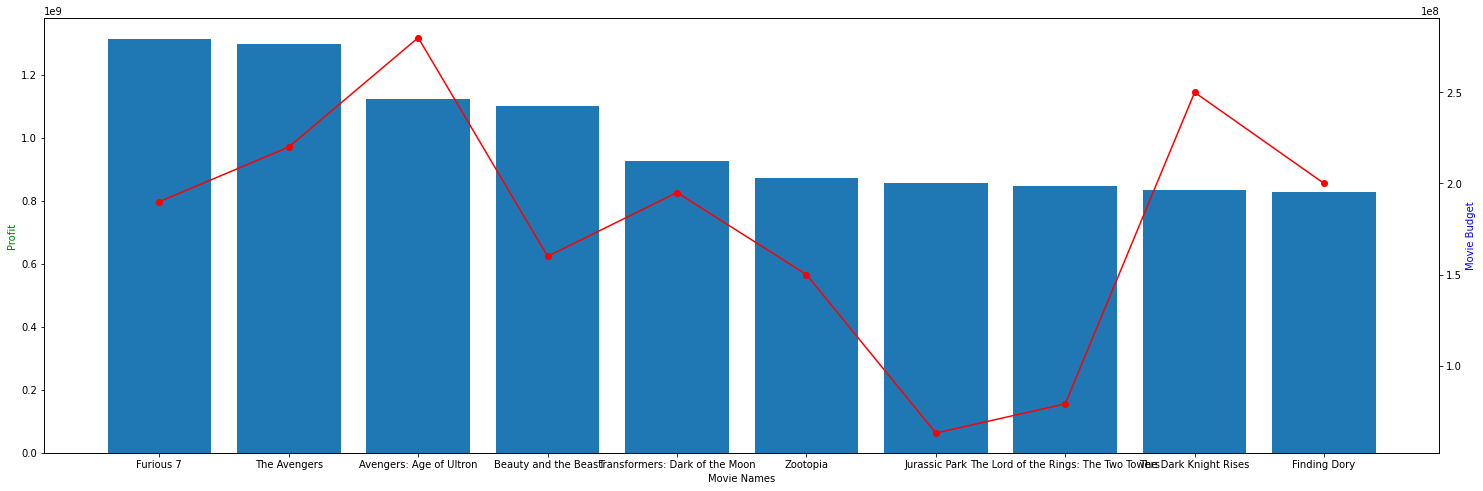

In [171]:
x=list(top_movies['original_title'])
y=list(top_movies['profit'])
y1=list(top_movies['budget'])

fig, ax1 = plt.subplots(figsize=(25, 8))

ax2 = ax1.twinx()
ax1.bar(x, y)
ax2.plot(x, y1, 'o-', color="red" )

ax1.set_xlabel('Movie Names')
ax1.set_ylabel('Profit', color='g')
ax2.set_ylabel('Movie Budget', color='b')

plt.show()

# **Here we have demonstrated the budget and the profit earned by a movie. It is clear that the Furios 7 had maximum profit earned. Although the budget of Avengers : Age of Ultron was high, comparitively the profit was not upto the expectations. The same is the case for The Dark Knight Rises. Whreas for the Jurassic Park the case is reversed**

# 2.This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)?

In [130]:
#ROI for movies
imdb_df['ROI']=100*(imdb_df['profit']/imdb_df['budget'])

**we will groupby on original language and find mean Roi**

In [179]:
imdb_new = imdb_df.groupby('original_language')['ROI'].mean().reset_index()
max_roi_lan = imdb_new[imdb_new['ROI']==imdb_new['ROI'].max()]
j=imdb_new.sort_values(by='ROI',ascending=False).head(5)
max_roi_lan

,original_language,ROI
18,ko,11277.949295


# First we calculated the return on investment by using the above formula. Using following statements we created a pie chart to demonstrate mean ROI based on the original language of the movie.

In [180]:
lab=list(j['original_language'])
x=list(j['ROI'])

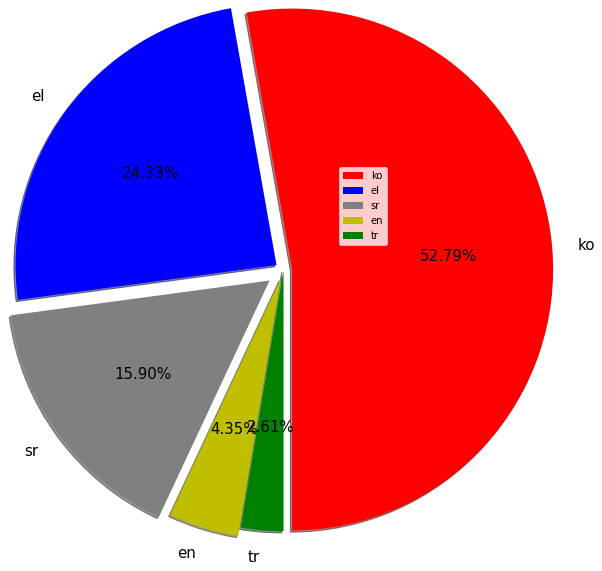

In [181]:
explode = [0.1,0.1,0.2,0.1,0] # To slice the perticuler section
colors = ["r", 'b','grey','y','g'] # Color of each section
textprops = {"fontsize":15} # Font size of text in pie chart
 
plt.pie(x, # Values
        labels = lab, # Labels for each sections
        explode = explode, # To slice the perticuler section
        colors =colors, # Color of each section
        autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 3, # Radius to increase or decrease the size of pie chart 
       startangle = 270, # Start angle of first section
        textprops =textprops) 
plt.legend() # To show legend
plt.show() # To show pie chart only

# 3.Find out the unique genres of movies in this dataset.

In [132]:
#function to extract genres
def extract1(genres):
  genre_list = []
  for i in genres:
    genre_list.append(i['name'])
  return genre_list

In [133]:
#appling function on genres creating a new column of genre name
imdb_df['genres_name']=imdb_df.apply(lambda x:extract1(x['genres']),axis=1)

In [134]:
imdb_df['genres_name']

0                                 [Comedy]
1         [Comedy, Drama, Family, Romance]
2                                  [Drama]
3                        [Thriller, Drama]
4                       [Action, Thriller]
                       ...                
2995                     [Comedy, Romance]
2996                        [Drama, Music]
2997    [Crime, Action, Mystery, Thriller]
2998                     [Comedy, Romance]
2999           [Thriller, Action, Mystery]
Name: genres_name, Length: 3000, dtype: object

In [135]:
#function to extract names from list of genre names
def extract_name_from_list(gen_name):
  for i in gen_name:
    if i in gen_name:
      gen_name = i
  return gen_name

In [136]:
# applied function to extract names from list of genre names
imdb_df['Names'] = imdb_df.apply(lambda x:extract_name_from_list(x['genres_name']),axis = 1).astype(str)

In [137]:
imdb_df['Names']

0         Comedy
1         Comedy
2          Drama
3       Thriller
4         Action
          ...   
2995      Comedy
2996       Drama
2997       Crime
2998      Comedy
2999    Thriller
Name: Names, Length: 3000, dtype: object

In [172]:
# unique genre name of movies
unique=set(imdb_df['Names'])
unique

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 '[]'}

In [173]:
lst=list(unique)

In [174]:
from wordcloud import WordCloud


In [175]:
words = " ".join(str(each) for each in lst)

<Figure size 720x432 with 0 Axes>

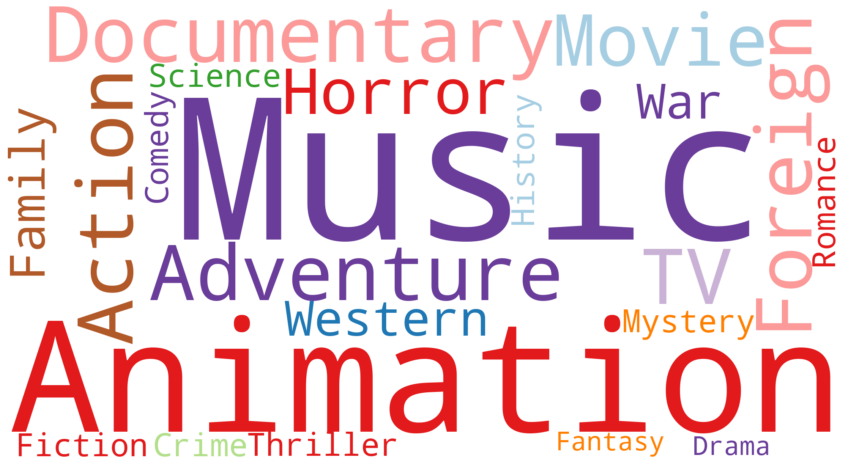

In [176]:
wordcloud = WordCloud(width=1980, height=1080, colormap="Paired_r",max_words=100, background_color="white").generate(words)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Instead of just creating a list of unique genres, we used wordcloud to display the genres in a fancy and catchya manner.

# 4.Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI?

In [139]:
imdb_df['directors_and_producers']

0                          ([Steve Pink], [Andrew Panay])
1       ([Garry Marshall], [Whitney Houston, Mario Isc...
2       ([Damien Chazelle], [David Lancaster, Michel L...
3                          ([Sujoy Ghosh], [Sujoy Ghosh])
4                                  ([Jong-seok Yoon], [])
                              ...                        
2995               ([Dennis Hopper], [James G. Robinson])
2996                 ([Lukas Moodysson], [Lars J√∂nsson])
2997    ([Renny Harlin], [Stephanie Austin, Shane Blac...
2998    ([John Hamburg], [Danny DeVito, Michael Shambe...
2999    ([John Singleton], [Doug Davison, Roy Lee, Ell...
Name: directors_and_producers, Length: 3000, dtype: object

In [140]:
type(['directors_and_producers'])

list

In [141]:
#function to extract directors
def tuple_to_list_directors(col):
  return col[0]

In [142]:
#function to extract producers
def tuple_to_list_producers(col):
  return col[1]

In [143]:
imdb_df['director'] = imdb_df['directors_and_producers'].apply(tuple_to_list_directors)

In [144]:
imdb_df['producer'] = imdb_df['directors_and_producers'].apply(tuple_to_list_producers)

In [145]:
imdb_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,crew,revenue,profit,directors_and_producers,actors,ROI,genres_name,Names,director,producer
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,-1685349,"([Steve Pink], [Andrew Panay])","[Rob Corddry, Craig Robinson, Clark Duke, Adam...",-12.038207,[Comedy],Comedy,[Steve Pink],[Andrew Panay]
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,55149435,"([Garry Marshall], [Whitney Houston, Mario Isc...","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",137.873588,"[Comedy, Drama, Family, Romance]",Comedy,[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin..."
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,9792000,"([Damien Chazelle], [David Lancaster, Michel L...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...",296.727273,[Drama],Drama,[Damien Chazelle],"[David Lancaster, Michel Litvak, Jason Blum, H..."
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,14800000,"([Sujoy Ghosh], [Sujoy Ghosh])","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",1233.333333,"[Thriller, Drama]",Thriller,[Sujoy Ghosh],[Sujoy Ghosh]
4,5,NaN,16450000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,-12526030,"([Jong-seok Yoon], [])","[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",-76.146079,"[Action, Thriller]",Action,[Jong-seok Yoon],[]


In [146]:
#creating new dataframe with all producers
df1 = imdb_df.explode('producer')

In [147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6638 entries, 0 to 2999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6638 non-null   int64  
 1   belongs_to_collection    1297 non-null   object 
 2   budget                   6638 non-null   int64  
 3   genres                   6638 non-null   object 
 4   homepage                 2497 non-null   object 
 5   imdb_id                  6638 non-null   object 
 6   original_language        6638 non-null   object 
 7   original_title           6638 non-null   object 
 8   overview                 6628 non-null   object 
 9   popularity               6638 non-null   float64
 10  poster_path              6637 non-null   object 
 11  production_companies     6444 non-null   object 
 12  production_countries     6570 non-null   object 
 13  release_date             6638 non-null   object 
 14  runtime                 

In [148]:
top_3_producers = df1.groupby('producer')['ROI'].mean().sort_values(ascending = False).iloc[0:3]

In [149]:
df1['producer'].value_counts().sort_values(ascending = False)

Neal H. Moritz         26
Joel Silver            21
Brian Grazer           20
Scott Rudin            20
Eric Fellner           19
                       ..
Stephen J. Friedman     1
Jay Baruchel            1
Ian Dimerman            1
Marty Hornstein         1
Dan Lautner             1
Name: producer, Length: 3546, dtype: int64

In [150]:
top_3_producers

producer
Amir Zbeda     1.288939e+06
Robin Cowie    4.132333e+05
Gregg Hale     4.132333e+05
Name: ROI, dtype: float64

# 5.Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor.

In [151]:
#create new dataframe to extract all actors
df2 = imdb_df.explode('actors')

In [152]:
most_acted_actors = df2['actors'].value_counts().sort_values(ascending = False).reset_index()

In [153]:
most_acted_actors.rename(columns={'index':'actor','actors':'count'},inplace=True)

In [154]:
#most_acted_actor 
most_acted_actor = most_acted_actors.iloc[0]
most_acted_actor

actor    Robert De Niro
count                30
Name: 0, dtype: object

In [155]:
#created a dataframe corresponding to most_acted_actor
df3 = df2[(df2['actors']=='Robert De Niro')]

In [156]:
#movies, genres and profits corresponding to this actor.
df3[['actors','original_title','genres_name','profit']].sort_values(['profit'],ascending = False)

,actors,original_title,genres_name,profit
1217,Robert De Niro,Meet the Parents,"[Comedy, Romance]",275444045
1879,Robert De Niro,American Hustle,"[Drama, Crime]",211171807
1389,Robert De Niro,Sleepers,"[Crime, Drama, Thriller]",121615285
2606,Robert De Niro,Analyze This,"[Comedy, Crime]",96885658
2901,Robert De Niro,Backdraft,"[Action, Crime, Drama, Mystery, Thriller]",77368585
1192,Robert De Niro,Wag the Dog,"[Comedy, Drama]",49256513
2164,Robert De Niro,Joy,"[Drama, Comedy]",41134059
2222,Robert De Niro,The Deer Hunter,"[Drama, War]",35000000
1916,Robert De Niro,Jackie Brown,"[Comedy, Crime, Romance]",27673162
2409,Robert De Niro,Men of Honor,[Drama],16814909


# Conclusion

# We tried to analyse the given dataset in terms of the given problem statement. The investors might go through the data insights and decide their upcoming movie accordingly based on the movie language,genres,and crew members.